## AutoEncoder

### 비지도학습: X만 있는 상태에서 학습하는 것 

### AutoEncoder : 입력값과 출력값을 같게 하는 신경망
: 입력층으로 들어온 데이터를 인코더 통해 은닉층으로 내보내고,
은닉층의 데이터를 디코더 통해 출력층으로 내보낸 뒤,
만들어진 출력값을 입력값과 비슷하도록 만드는 가중치 찾아냄


 * 가운데 계층의 노두 수가 입력값보다 적다
 * 입력 데이터를 압축하는 효과 & 노이즈 제거에 매우 효과적 
 * 변이형, 잡음제거 등 다양한 방식이 있음 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 하이퍼파라미터 옵션들을 따로 구조화 

learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 히든 레이어의 뉴런 갯수
n_hidden = 256  
# 입력값 크기(이미지 픽셀수)
n_input = 28*28  

In [3]:
# 1. 신경망 모델 구성 

X = tf.placeholder(tf.float32, [None, n_input])

# 인코더
## 입력값 : 입력층의 크기 은닉층 : n_hidden 개 
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# 인코더 레이어 구성 : 시그모이드 함수 이용 
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# 디코더 
## 입력값: 은닉층의 크기, 출력값 : 입력층의 크기
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 손실함수 : 가중치 최적화 -> 출력값을 입력값과 가장 비슷하게 만드는 것 
# 입력값 X : 평가를 위한 실측 값으로 사용. 디코더 결과값과 차이를 손실값으로 설정
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# 2. 신경망 모델 학습 


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.2044
Epoch: 0002 Avg. cost = 0.0629
Epoch: 0003 Avg. cost = 0.0509
Epoch: 0004 Avg. cost = 0.0442
Epoch: 0005 Avg. cost = 0.0401
Epoch: 0006 Avg. cost = 0.0383
Epoch: 0007 Avg. cost = 0.0373
Epoch: 0008 Avg. cost = 0.0366
Epoch: 0009 Avg. cost = 0.0360
Epoch: 0010 Avg. cost = 0.0353
Epoch: 0011 Avg. cost = 0.0350
Epoch: 0012 Avg. cost = 0.0347
Epoch: 0013 Avg. cost = 0.0344
Epoch: 0014 Avg. cost = 0.0341
Epoch: 0015 Avg. cost = 0.0339
Epoch: 0016 Avg. cost = 0.0337
Epoch: 0017 Avg. cost = 0.0326
Epoch: 0018 Avg. cost = 0.0320
Epoch: 0019 Avg. cost = 0.0318
Epoch: 0020 Avg. cost = 0.0316
최적화 완료!


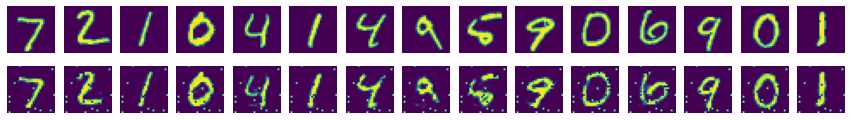

In [5]:
# 3. 결과 

## matplotlib 사용, 이미지 출력

sample_size = 15

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()